<a href="https://colab.research.google.com/github/gmelaku/Assignment1/blob/master/Lab3(Part_B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

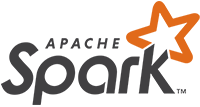 
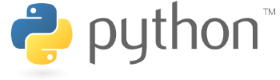

## Cogroup in PySpark based on Example **2**

Implement the second example (Table A, consisting of 6 triples and Table B, consisting of 5 pairs, respectively) from these cogroup slides from lecture (these are in Lecture 11).


# Import all spark related dependencies

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz

# !tar -xvf /content/spark-2.4.5-bin-hadoop2.7.tgz
!tar -xvf  spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

import findspark
findspark.init()

# Create a blank SparkContext
from pyspark import SparkContext
sc = SparkContext()

## Create base RDD from example 2

In [0]:
A = sc.parallelize([(1, 2, 3), (4, 2, 1),(8,3, 4),(4, 3, 3), (7, 2, 5), (8, 4 ,3)])
B= sc.parallelize([(2, 4), (8, 9), (1, 3), (2, 7), (2, 9), (4, 6), (4, 9)])


# **Create cogroup RDD**

In [0]:
cogroup_rdd = A.cogroup(B)

# Collect the final rdd after the grouping 

In [8]:
cogroup_rdd.collect()

[(4,
  (<pyspark.resultiterable.ResultIterable at 0x7ffb45e545c0>,
   <pyspark.resultiterable.ResultIterable at 0x7ffb45e544a8>)),
 (8,
  (<pyspark.resultiterable.ResultIterable at 0x7ffb45e54518>,
   <pyspark.resultiterable.ResultIterable at 0x7ffb45e54f28>)),
 (1,
  (<pyspark.resultiterable.ResultIterable at 0x7ffb45e546d8>,
   <pyspark.resultiterable.ResultIterable at 0x7ffb45e541d0>)),
 (2,
  (<pyspark.resultiterable.ResultIterable at 0x7ffb45e54748>,
   <pyspark.resultiterable.ResultIterable at 0x7ffb45e54320>)),
 (7,
  (<pyspark.resultiterable.ResultIterable at 0x7ffb45e54198>,
   <pyspark.resultiterable.ResultIterable at 0x7ffb45e54d30>))]

In [10]:
[(A, map(list,B)) for A, B in cogroup_rdd.collect()]

[(4, <map at 0x7ffb457d2630>),
 (8, <map at 0x7ffb457d2278>),
 (1, <map at 0x7ffb457d2518>),
 (2, <map at 0x7ffb457d2208>),
 (7, <map at 0x7ffb4575f780>)]